# Figure S1A 

# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import symbols, solve, simplify
import pandas as pd
import sympy as sp
plt.rcParams.update({'font.size': 20})

# Model 

Definition of the parameters of the model 


In [2]:
T, V1, V2, K1, K2, Kb = symbols('T V1 V2 K1 K2 Kb') 
Vs, Rb, Ks, Vrg, Qb, Krg = symbols('Vs Rb Ks Vrg Qb Krg')
R, F, Kd, Q, E, Ke = symbols('R F Kd Q E Ke')
S1, Qtot, S2, Rtot= symbols('S1 Qtot S2 Rtot')

Solve the evolution equation for T

In [3]:
# Evolution equation for T: 
expr = V1*(1-T)/(K1+(1-T))-V2*T/(K2+T)-Kb*T
expr_simplified= V1*(1-T)*(K2+T) -V2*T*(K1+(1-T))-Kb*T*(K1+(1-T))*(K2+T)
print('Evolution equation for T:')
print(expr)

# Substitute the expression for V1 and V2 in the evolution equation for T:  
expr_RQ= expr_simplified.subs([(V1, Vs*(R*F/(Kd+F))/(Ks+(R*F/(Kd+F)))),(V2, Vrg*(Q*E/(Ke+E))/(Krg+(Q*E/(Ke+E))))])

# Substitute the expressions for Q and R
expr_S1S2 = expr_RQ.subs([(R, Rtot*S1),(Q, Qtot*S2)])

# Expliciting the relation between S1 and S2 to obtain T(FGF, S1): 
expr_T = expr_S1S2.subs([(S2,-1.1265*S1 +0.9092)])

print('Evolution equation for T (all parameters explicited):')
print(expr_T)

# Solve the equation 
sol = solve(expr_T, T)[2]

Evolution equation for T:
-Kb*T - T*V2/(K2 + T) + V1*(1 - T)/(K1 - T + 1)
Evolution equation for T (all parameters explicited):
-E*Qtot*T*Vrg*(0.9092 - 1.1265*S1)*(K1 - T + 1)/((E + Ke)*(E*Qtot*(0.9092 - 1.1265*S1)/(E + Ke) + Krg)) + F*Rtot*S1*Vs*(1 - T)*(K2 + T)/((F + Kd)*(F*Rtot*S1/(F + Kd) + Ks)) - Kb*T*(K2 + T)*(K1 - T + 1)


Definition of the function ExprT that compute T as a function of all the parameters of the equation

In [4]:
def exprT(Vs_v=1, Vrg_v=0.4, K1_v=0.5, K2_v=0.2, Krg_v=1200, Ks_v=1200, Kb_v=0.2, F_v=5, Kd_v=25, E_v=5, Ke_v=50, Rtot_v=2000, Qtot_v=2000, S1_v=0.5):
    sol_T = sol.subs([(Vs,Vs_v),(Vrg,Vrg_v),(K1, K1_v),(K2,K2_v),(Krg, Krg_v), (Ks, Ks_v), (Kb, Kb_v),(F, F_v),(Kd, Kd_v),(E,E_v), (Ke, Ke_v),(Rtot, Rtot_v),(Qtot,Qtot_v),(S1,S1_v)])
    sol_T = np.real(np.array(sol_T,complex))
    return sol_T

 Definition of the function to compute Erk (as a function of T): 

In [5]:
def Erk(T,n=2, Kerk=0.5, Erk_max=1, Erk_bas=0): 
    Erk = [Erk_max* T[i]**n/(T[i]**n +Kerk**n) + Erk_bas for i in range(len(T))]
    return Erk

# Import the experimental data 

In [6]:
#read the excel file with the experimental data
data_S1 = pd.read_excel('/Users/rossanabettoni/Desktop/PhD/Article_PLOS/ExpData.xlsx', sheet_name='Cell surface contacts')
df_S1 = pd.DataFrame(data_S1)

data_Fig2A = pd.read_excel('/Users/rossanabettoni/Desktop/PhD/Article_PLOS/ExpData.xlsx', sheet_name='Fig 2A')
df_Fig2A = pd.DataFrame(data_Fig2A)

Cell surface contacts with FGF (S1)

In [7]:
a65_RelContactArea_A = np.array(df_S1['a6.5 S1'].values.tolist())[0:25] 
a66_RelContactArea_A = np.array(df_S1['a6.6 S1'].values.tolist())[0:25] 
a67_RelContactArea_A = np.array(df_S1['a6.7 S1'].values.tolist())[0:25] 
a68_RelContactArea_A = np.array(df_S1['a6.8 S1'].values.tolist())[0:25] 

# Compute the mean value of S1 for each cell type (averaging the exp data)
mean_S1_a65 = np.mean(a65_RelContactArea_A)
mean_S1_a66 = np.mean(a66_RelContactArea_A)
mean_S1_a67 = np.mean(a67_RelContactArea_A)
mean_S1_a68 = np.mean(a68_RelContactArea_A)

mean_area = [mean_S1_a65,mean_S1_a66,mean_S1_a67,mean_S1_a68]

Experimental data figure 2A

In [8]:
# Convert the databases into lists 
a65_Erk = np.array(df_Fig2A['a6.5'].values.tolist())
a66_Erk = np.array(df_Fig2A['a6.6'].values.tolist())
a67_Erk = np.array(df_Fig2A['a6.7'].values.tolist())
a68_Erk = np.array(df_Fig2A['a6.8'].values.tolist())

# Compute the mean of the experimental data
mean_a65_Erk = np.mean(a65_Erk)
mean_a66_Erk = np.mean(a66_Erk)
mean_a67_Erk = np.mean(a67_Erk)
mean_a68_Erk = np.mean(a68_Erk)

mean_Erk_exp = [mean_a68_Erk,mean_a66_Erk,mean_a67_Erk,mean_a65_Erk]

# Compute the std of exp data
sdev_a65_Erk_exp = np.std(a65_Erk)
sdev_a66_Erk_exp = np.std(a66_Erk)
sdev_a67_Erk_exp = np.std(a67_Erk)
sdev_a68_Erk_exp = np.std(a68_Erk)

Std_exp = [sdev_a68_Erk_exp,sdev_a66_Erk_exp,sdev_a67_Erk_exp,sdev_a65_Erk_exp]

# Results

## Figure S1A

Compute Erk activity 

In [9]:
Erk_max= 1 
Erk_bas = 0  

T_pred_a65 = [exprT(S1_v= a65_RelContactArea_A[i]) for i in range(len(a65_RelContactArea_A))]
T_pred_a66 = [exprT(S1_v= a66_RelContactArea_A[i]) for i in range(len(a66_RelContactArea_A))]
T_pred_a67 = [exprT(S1_v= a67_RelContactArea_A[i]) for i in range(len(a67_RelContactArea_A))]
T_pred_a68 = [exprT(S1_v= a68_RelContactArea_A[i]) for i in range(len(a68_RelContactArea_A))]

Erk_pred_a65_a = Erk(T_pred_a65)
Erk_pred_a66_a = Erk(T_pred_a66)
Erk_pred_a67_a = Erk(T_pred_a67)
Erk_pred_a68_a = Erk(T_pred_a68)

# Compute the mean Erk value for each cell type (with our model)
mean_a65_Erk_model_a= np.mean(Erk_pred_a65_a) 
mean_a66_Erk_model_a= np.mean(Erk_pred_a66_a)
mean_a67_Erk_model_a= np.mean(Erk_pred_a67_a)
mean_a68_Erk_model_a= np.mean(Erk_pred_a68_a)
Erk_mean_a = [mean_a65_Erk_model_a, mean_a66_Erk_model_a, mean_a67_Erk_model_a, mean_a68_Erk_model_a]

# Compute the std
sdev_a65_Erk_model_a = np.std(Erk_pred_a65_a)
sdev_a66_Erk_model_a = np.std(Erk_pred_a66_a)
sdev_a67_Erk_model_a = np.std(Erk_pred_a67_a)
sdev_a68_Erk_model_a = np.std(Erk_pred_a68_a)

sdev_mean_a = [sdev_a65_Erk_model_a, sdev_a66_Erk_model_a, sdev_a67_Erk_model_a, sdev_a68_Erk_model_a]

Compute Erk fluorescence

In [10]:
Erk_m= 1850 
Erk_b = np.mean(a68_Erk)  

Erk_pred_a65_f = Erk(T_pred_a65, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a66_f = Erk(T_pred_a66, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a67_f = Erk(T_pred_a67, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a68_f = Erk(T_pred_a68, Erk_max=Erk_m, Erk_bas=Erk_b)

# Compute the mean Erk value for each cell type (with our model)
mean_a65_Erk_model_f= np.mean(Erk_pred_a65_f) 
mean_a66_Erk_model_f= np.mean(Erk_pred_a66_f)
mean_a67_Erk_model_f= np.mean(Erk_pred_a67_f)
mean_a68_Erk_model_f= np.mean(Erk_pred_a68_f)
Erk_mean_f = [mean_a65_Erk_model_f, mean_a66_Erk_model_f, mean_a67_Erk_model_f, mean_a68_Erk_model_f]

# Compute the std
sdev_a65_Erk_model_f = np.sqrt(Erk_max**2*sdev_a65_Erk_model_a**2+sdev_a68_Erk_exp**2)
sdev_a66_Erk_model_f = np.sqrt(Erk_max**2*sdev_a66_Erk_model_a**2+sdev_a68_Erk_exp**2)
sdev_a67_Erk_model_f = np.sqrt(Erk_max**2*sdev_a67_Erk_model_a**2+sdev_a68_Erk_exp**2)
sdev_a68_Erk_model_f = np.sqrt(Erk_max**2*sdev_a68_Erk_model_a**2+sdev_a68_Erk_exp**2)
sdev_mean_f = [sdev_a65_Erk_model_f, sdev_a66_Erk_model_f, sdev_a67_Erk_model_f, sdev_a68_Erk_model_f]


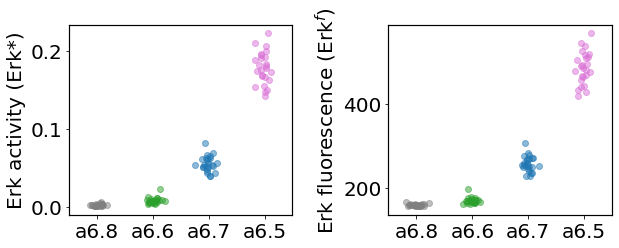

In [11]:
plt.figure(figsize=(9,3.6))

axs= plt.subplot(121)

x = np.random.normal(1, 0.08, size=len(Erk_pred_a68_a))
axs.plot(x,Erk_pred_a68_a,'.', markersize=12, color='grey', alpha=0.5, zorder=1)

x = np.random.normal(2, 0.08, size=len(Erk_pred_a66_a))
axs.plot(x,Erk_pred_a66_a,'.', markersize=12, color='tab:green', alpha=0.5, zorder=1)

x = np.random.normal(3, 0.08, size=len(Erk_pred_a67_a))
axs.plot(x,Erk_pred_a67_a,'.', markersize=12, color='tab:blue', alpha=0.5, zorder=1)

x = np.random.normal(4, 0.08, size=len(Erk_pred_a65_a))
axs.plot(x,Erk_pred_a65_a,'.', markersize=12, color='orchid', alpha=0.5, zorder=1)

for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(1.2)

axs.set_xlim([0.5,4.5])
axs.set_ylabel('Erk activity (Erk*)')
axs.set_xticks([1,2,3,4])
axs.set_xticklabels(['a6.8', 'a6.6', 'a6.7','a6.5'])

axs= plt.subplot(122)

x = np.random.normal(1, 0.08, size=len(Erk_pred_a68_f))
axs.plot(x,Erk_pred_a68_f,'.', markersize=12, color='grey', alpha=0.5, zorder=1)

x = np.random.normal(2, 0.08, size=len(Erk_pred_a66_f))
axs.plot(x,Erk_pred_a66_f,'.', markersize=12, color='tab:green', alpha=0.5, zorder=1)

x = np.random.normal(3, 0.08, size=len(Erk_pred_a67_f))
axs.plot(x,Erk_pred_a67_f,'.', markersize=12, color='tab:blue', alpha=0.5, zorder=1)

x = np.random.normal(4, 0.08, size=len(Erk_pred_a65_f))
axs.plot(x,Erk_pred_a65_f,'.', markersize=12, color='orchid', alpha=0.5, zorder=1)

for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(1.2)
    
axs.set_xlim([0.5,4.5])
axs.set_ylabel('Erk fluorescence (Erk$^f$)')
axs.set_xticks([1,2,3,4])
axs.set_xticklabels(['a6.8', 'a6.6', 'a6.7','a6.5'])

plt.tight_layout()
plt.show()